In [1]:
# import some plotting libraries we like
import plotly.express as px
import numpy as np
from plotly.offline import plot

In [2]:
# load our data
import csv
import pandas as pd

# df = pd.read_csv('Downloads\iteris_augmented_data.csv')

df = pd.read_csv('data/iteris_small_with_accident.csv')
# look at our data
df

,Unnamed: 0,latitude,longitude,zipCode,regionCode,speed,acclrType,Local_DateTime,tavg,tmin,...,wpgt,pres,tsun,city,year,month,day,hour,minute,dow
0,0,44.541378,-69.652527,4901,ME,11.00,HARD_ACCELERATION,2022-05-23 14:32:00,14.8,9.4,...,NaN,1022.4,NaN,Carmel,2022,5,23,14,32,0
1,1,44.526413,-69.616676,4901,ME,34.86,HARD_ACCELERATION,2022-05-23 15:13:00,14.8,9.4,...,NaN,1022.4,NaN,Carmel,2022,5,23,15,13,0
2,2,44.568649,-69.638733,4901,ME,18.14,HARD_ACCELERATION,2022-05-23 15:38:00,14.8,9.4,...,NaN,1022.4,NaN,Carmel,2022,5,23,15,38,0
3,3,44.526249,-69.616188,4901,ME,71.70,HARD_ACCELERATION,2022-05-23 15:13:00,14.8,9.4,...,NaN,1022.4,NaN,Carmel,2022,5,23,15,13,0
4,4,44.604271,-69.683113,4937,ME,35.13,HARD_ACCELERATION,2022-05-23 15:16:00,14.8,9.4,...,NaN,1022.4,NaN,Carmel,2022,5,23,15,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4693,2693,43.354798,-70.590471,04090,ME,0.00,2,2019-08-21 17:36:31,18.5,12.2,...,NaN,1014.3,NaN,"I-95 N, Wells, York, ME, US",2019,8,21,17,36,2
4694,2694,44.258829,-70.837902,04231-3113,ME,0.00,2,2019-08-22 20:52:48,22.5,17.8,...,NaN,NaN,NaN,"Maine St, Stoneham, Oxford, ME, US",2019,8,22,20,52,3
4695,2695,43.649540,-70.289040,04102,ME,0.00,2,2019-08-22 17:30:32,23.2,18.9,...,NaN,1009.1,NaN,"I-295 N, Portland, Cumberland, ME, US",2019,8,22,17,30,3
4696,2696,44.270233,-70.268452,04282-3780,ME,0.00,2,2019-08-23 08:40:51,19.8,15.0,...,NaN,1014.9,NaN,"Springbrook Rd, Turner, Androscoggin, ME, US",2019,8,23,8,40,4


In [3]:
# make a map showing locations of incidents, with hour as color
# see https://plotly.com/python/scattermapbox/ for more info and how you can make this much better
fig = px.scatter_mapbox(df, lat="latitude", lon="longitude",
                        color="hour", hover_name = 'speed', size = 'speed', zoom=10,
                        color_continuous_scale=px.colors.cyclical.Twilight,
                        mapbox_style='open-street-map')

# fig.update_traces(cluster=dict(enabled=True))

plot(fig, auto_open=True)

'temp-plot.html'

In [3]:
import plotly.graph_objects as go
from ipywidgets import interact, widgets
from IPython.display import display

In [4]:


avg_speed_by_hour = df.groupby( 'hour')['speed'].mean()
print(avg_speed_by_hour)

unique_hours = df['hour'].unique()
min_speed = df['speed'].min()
max_speed = df['speed'].max()

min_hour = df['hour'].min()
max_hour = df['hour'].max()
def create_plot(data):
    fig = px.bar(data, unique_hours, avg_speed_by_hour)
    
    fig.update_layout(title='Driving Speeds based on time of day')
    fig.update_xaxes(title_text='Hour')

    fig.update_yaxes(title_text='Average Speed')
    fig.show()
create_plot(df)




hour
0      0.000000
1      0.000000
2      1.912000
3      4.832778
4      4.715313
5     15.194688
6     22.611444
7     16.777930
8      3.530885
9      2.846026
10     1.718137
11     0.815494
12     1.888961
13     5.665988
14     4.161459
15    18.414155
16    19.378718
17    18.047987
18    12.389444
19    18.484523
20    11.744956
21     5.836456
22    21.653333
23    18.668537
Name: speed, dtype: float64


In [ ]:
# for more on mapping and animations of maps: https://towardsdatascience.com/visualizing-geospatial-data-in-python-e070374fe621
# if you are not a coder, check out https://www.google.com/earth/outreach/learn/visualize-your-data-on-a-custom-map-using-google-my-maps/
# or check out dataiku

In [5]:
df = pd.read_csv('data/iteris_full_with_accident.csv')
# look at our data
df



/var/folders/cz/vym22b2500g9mg30q2r7_2zc0000gn/T/ipykernel_7423/1133490736.py:1: DtypeWarning:

Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.



,Unnamed: 0,latitude,longitude,zipCode,regionCode,speed,acclrType,Local_DateTime,tavg,tmin,...,pres,tsun,address,city,year,month,day,hour,minute,dow
0,0,44.644608,-69.844582,4978,ME,40.30,HARD_BRAKE,2022-04-30 14:12:00,7.0,1.7,...,1019.1,NaN,"3-23 North Shore Dr, Smithfield, ME, 04978, USA",Smithfield,2022,4,30,14,12,5
1,1,44.569183,-69.635231,4901,ME,57.92,HARD_ACCELERATION,2022-04-30 20:10:00,7.0,1.7,...,1019.1,NaN,"2-70 Industrial St, Waterville, ME, 04901, USA",Waterville,2022,4,30,20,10,5
2,2,44.562614,-69.635559,4901,ME,22.45,HARD_ACCELERATION,2022-04-30 20:37:00,7.0,1.7,...,1019.1,NaN,"306-308 Main St, Waterville, ME, 04901, USA",Waterville,2022,4,30,20,37,5
3,3,44.569939,-69.639664,4901,ME,12.97,HARD_ACCELERATION,2022-04-30 20:46:00,7.0,1.7,...,1019.1,NaN,"361-375 Main St, Waterville, ME, 04901, USA",Waterville,2022,4,30,20,46,5
4,4,44.613670,-69.594170,4937,ME,51.42,HARD_ACCELERATION,2022-04-30 19:44:00,7.0,1.7,...,1019.1,NaN,"151-261 Skowhegan Rd, Fairfield, ME, 04937, USA",Fairfield,2022,4,30,19,44,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115800,2693,43.354798,-70.590471,04090,ME,0.00,2,2019-08-21 17:36:31,18.5,12.2,...,1014.3,NaN,"I-95 N, Wells, York, ME, US","I-95 N, Wells, York, ME, US",2019,8,21,17,36,2
115801,2694,44.258829,-70.837902,04231-3113,ME,0.00,2,2019-08-22 20:52:48,22.5,17.8,...,NaN,NaN,"Maine St, Stoneham, Oxford, ME, US","Maine St, Stoneham, Oxford, ME, US",2019,8,22,20,52,3
115802,2695,43.649540,-70.289040,04102,ME,0.00,2,2019-08-22 17:30:32,23.2,18.9,...,1009.1,NaN,"I-295 N, Portland, Cumberland, ME, US","I-295 N, Portland, Cumberland, ME, US",2019,8,22,17,30,3
115803,2696,44.270233,-70.268452,04282-3780,ME,0.00,2,2019-08-23 08:40:51,19.8,15.0,...,1014.9,NaN,"Springbrook Rd, Turner, Androscoggin, ME, US","Springbrook Rd, Turner, Androscoggin, ME, US",2019,8,23,8,40,4


In [6]:
fig = px.scatter_mapbox(df, lat="latitude", lon="longitude",
                        color="hour", hover_name = 'speed', size = 'speed', zoom=10,
                        color_continuous_scale=px.colors.cyclical.Twilight,
                        mapbox_style='open-street-map')

# fig.update_traces(cluster=dict(enabled=True))

plot(fig, auto_open=True)

'temp-plot.html'

In [84]:


avg_speed_by_hour = df.groupby( 'hour')['speed'].mean()
print(avg_speed_by_hour)

unique_hours = df['hour'].unique()
min_speed = df['speed'].min()
max_speed = df['speed'].max()

min_hour = df['hour'].min()
max_hour = df['hour'].max()
def create_plot(data):
    fig = px.bar(data, unique_hours, avg_speed_by_hour)
    
    fig.update_layout(title='Driving Speeds based on time of day')
    fig.update_xaxes(title_text='Hour')

    fig.update_yaxes(title_text='Average Speed')
    fig.show()
create_plot(df)




hour
0     23.756122
1     30.983727
2     33.166824
3     31.026500
4     34.996954
5     32.057656
6     31.719805
7     29.656470
8     30.071261
9     30.133056
10    29.633555
11    30.412434
12    30.649691
13    30.289563
14    30.772490
15    31.078502
16    30.912005
17    31.400771
18    32.144995
19    33.090697
20    33.069079
21    34.157014
22    32.488778
23    29.062869
Name: speed, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` expl

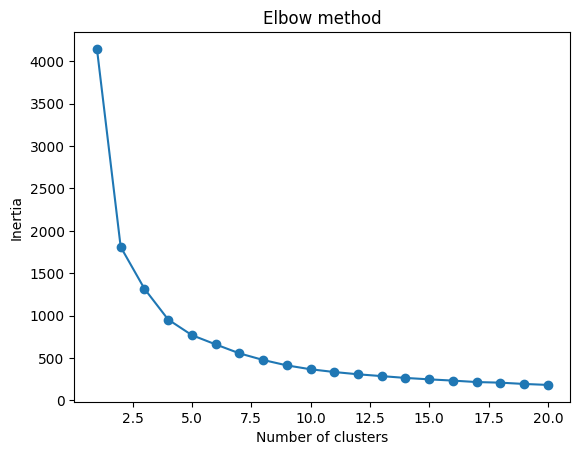

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertias=[]

subset = df[['latitude', 'longitude']].values

for i in range(1,21):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(subset)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,21), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [41]:
# 10 clusters based on inertia 
k=100


kmeans = KMeans(n_clusters=k)
# print(subset.shape)
kmeans.fit(subset)


df['cluster'] = kmeans.labels_
# print(kmeans.labels_.shape)
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['centroid_latitude', 'centroid_longitude'])
# print(cluster_centers.shape)
# print(cluster_centers.head)
# print(df.head)
# Plot the Mapbox scatter plot with centroids and clusters


fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", color ='cluster',
                         hover_name='speed', zoom=10,
                        color_continuous_scale=px.colors.cyclical.Twilight,
                        mapbox_style='open-street-map')


# Add centroids to the plot
# print(cluster_centers['centroid_latitude'])
# fig.add_trace(go.Scattermapbox(
#     lat=cluster_centers['centroid_latitude'],
#     lon=cluster_centers['centroid_longitude'],
#     mode='markers',
#     marker=dict(size=16, color='red', symbol='.'),
#     name='Centroids'
# ))


# fig2 = px.scatter_mapbox(subset, lat="centroid_latitude", lon="centroid_longitude", zoom=10,
#                         color_continuous_scale=px.colors.cyclical.Twilight,
#                         mapbox_style='open-street-map')

fig.show()
# fig2.show()







/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [39]:
# df_sub = pd.DataFrame(subset, columns=['centroid_latitude', 'centroid_longitude'])
# print(subset.shape)
# print(df_sub.head)
size =[100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100]
cluster_centers['size']= size
print(cluster_centers)
fig2 = px.scatter_mapbox(cluster_centers, lat="centroid_latitude", lon="centroid_longitude",zoom=10,size='size',
                        color_continuous_scale=px.colors.cyclical.Twilight,
                         mapbox_style='open-street-map')

fig2.show()


    centroid_latitude  centroid_longitude  size
0           44.543581          -69.664483   100
1           43.605945          -70.371941   100
2           44.938768          -68.697114   100
3           44.503124          -69.876300   100
4           44.605936          -69.540713   100
..                ...                 ...   ...
95          45.086133          -67.113167   100
96          43.926388          -69.913738   100
97          43.790059          -70.793193   100
98          44.532264          -69.407363   100
99          44.529359          -69.608641   100

[100 rows x 3 columns]
